In [ ]:
# Connecting and Extraxting dataset from Kaggle.com

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout, BatchNormalization


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(directory='/content/train',
                                                    labels='inferred',
                                                    label_mode='int',
                                                    color_mode='rgb',
                                                    batch_size=32,
                                                    image_size=(256, 256),
                                                    validation_split=None)

test_ds = keras.utils.image_dataset_from_directory(directory='/content/test',
                                                    labels='inferred',
                                                    label_mode='int',
                                                    color_mode='rgb',
                                                    batch_size=32,
                                                    image_size=(256, 256),
                                                    validation_split=None)

In [ ]:
# Normalization
def processImageNormalization(image, label):
  image = tf.cast(image/255.0, tf.float32)
  return image, label


In [ ]:
train_ds = train_ds.map(processImageNormalization)
test_ds = test_ds.map(processImageNormalization)

AlexNet Architecture

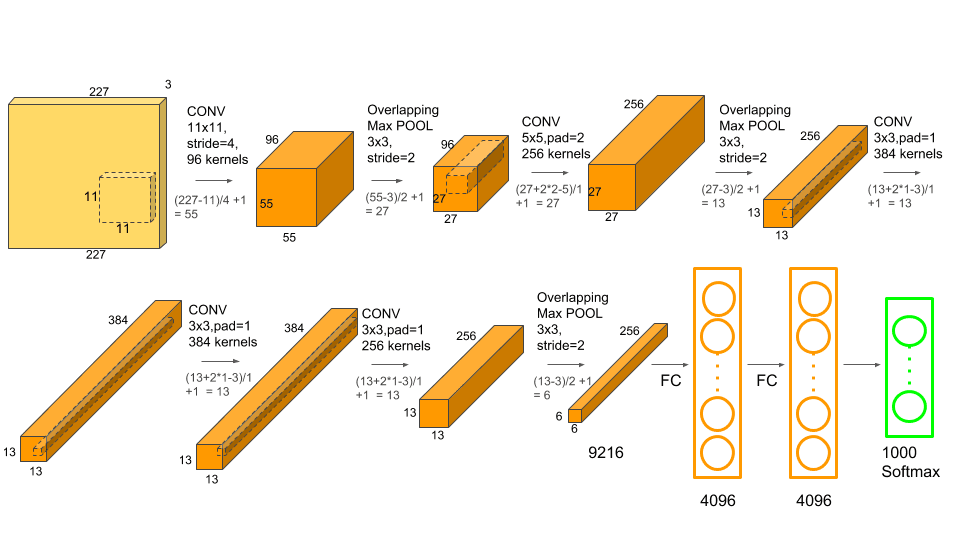

In [ ]:
from keras.layers.serialization import activation
model = Sequential()
# Conv 1 layer
model.add(Conv2D(96,
           kernel_size=(11,11),
           strides = 4,
           padding = "valid",
           activation='relu',
           input_shape=(256,256,3)))

model.add(BatchNormalization())

model.add(
    MaxPooling2D(pool_size = (3,3),
                 strides = 2,
                 padding = 'valid'))
# Conv 2 layer
model.add(
    Conv2D(256,
           kernel_size=(5,5),
           strides = 2,
           padding = "same",
           activation='relu'))

model.add(
    MaxPooling2D(pool_size = (3,3),
                 strides = 2,
                 padding = 'valid'))

# Conv 3 layer
model.add(
    Conv2D(384,
           kernel_size=(3,3),
           strides = 1,
           padding = "same",
           activation='relu'))
model.add(BatchNormalization())

# Conv 4 layer
model.add(
    Conv2D(384,
           kernel_size=(3,3),
           strides = 1,
           padding = "valid",
           activation='relu'))
model.add(BatchNormalization())

# Conv 5 layer
model.add(
    Conv2D(256,
           kernel_size=(3,3),
           strides = 1,
           padding = "valid",
           activation='relu'))
model.add(BatchNormalization())
model.add(
    MaxPooling2D(pool_size = (3,3),
                 strides = 2,
                 padding = 'valid'))

# Flatten
model.add(Flatten())

# Build Deep Neural Network
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))

model.summary()


In [ ]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, batch_size = 32, epochs=11, validation_data=test_ds)

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
test_img = cv2.imread('/content/dog2.jpeg')
plt.imshow(test_img)

In [ ]:
cv2_imshow(test_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
test_img.shape

In [ ]:
test_img_reshape = cv2.resize(test_img, (256, 256))
test_img_reshape.shape

In [ ]:
test_input = test_img_reshape.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)

In [ ]:
# Visualize the output

f,ax = plt.subplots()
ax.plot([None]+ history.history['accuracy'], 'o-')
ax.plot([None]+ history.history['val_accuracy'], 'x-')

ax.legend(['Training Accuracy', 'Validation Accuracy'], loc=0)
ax.set_title('Comparision of Train & Test result')

ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')

In [ ]:
f,ax = plt.subplots()
ax.plot([None]+ history.history['loss'], 'o-')
ax.plot([None]+ history.history['val_loss'], 'x-')

ax.legend(['Training loss', 'Validation loss'], loc=0)
ax.set_title('Comparision of Train & Test loss result')

ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')